# WeatherPy
----

#### Analysis 
The question to be answered was, "What's the weather like as we approach the equator?".  To answer the question, I considered randomly sampled cities at all latitudes.  While there are more cities above vs below the equator, we observe from the chart, "City Latitude vs. Max Temperature", that maximum temperatures tend to be near the equator.  

I found no relationship: a) between latitude and humidity; b) between latitude and cloudiness; and c) between latitude and wind speed.  


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Zinder
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd2d93e40768e20f518c994080b4ec2e&q=zinder
Processing Record 2 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd2d93e40768e20f518c994080b4ec2e&q=bredasdorp
Processing Record 3 | Riyadh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd2d93e40768e20f518c994080b4ec2e&q=riyadh
Processing Record 4 | Codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd2d93e40768e20f518c994080b4ec2e&q=codrington
Processing Record 5 | Kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd2d93e40768e20f518c994080b4ec2e&q=kirakira
Processing Record 6 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd2d93e40768e20f518c994080b4ec2e&q=hermanus
Processing Record 7 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imper

In [5]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# # Display count of weather data values 
weather_data.count()



City          571
Cloudiness    571
Country       571
Date          571
Humidity      571
Lat           571
Lng           571
Max Temp      571
Wind Speed    571
dtype: int64

In [6]:
# Save data frame to CSV
weather_data.to_csv("weather_data")


# # Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Zinder,0,NE,1562133478,69,13.81,8.99,82.40,9.17
1,Bredasdorp,38,ZA,1562133479,82,-34.53,20.04,62.01,8.05
2,Riyadh,0,SA,1562133294,11,24.63,46.72,96.80,3.36
3,Codrington,40,AU,1562133482,68,-28.95,153.24,69.80,16.11
4,Kirakira,100,SB,1562133483,86,-10.46,161.92,79.04,9.06


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

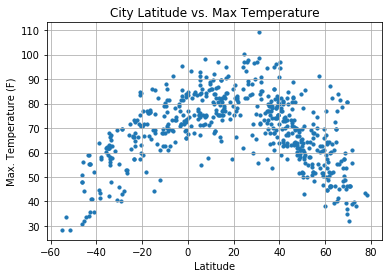

In [7]:
# Latitude vs. Temperature Plot
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

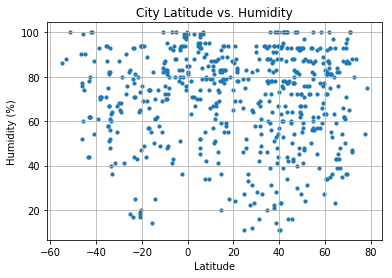

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

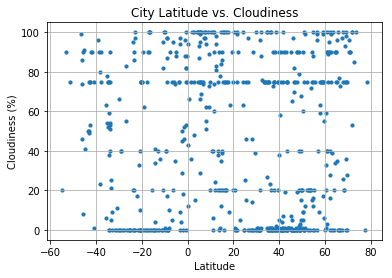

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

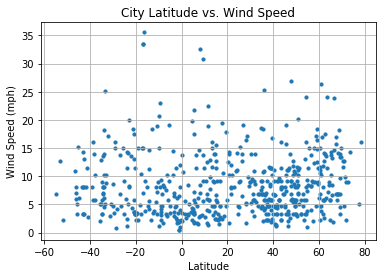

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()


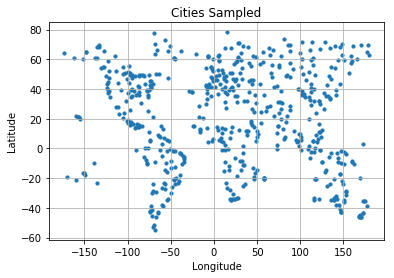

In [12]:
plt.scatter(weather_data["Lng"],weather_data["Lat"], marker="o", s=10)
plt.title("Cities Sampled")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)
plt.show()

